In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Sensitivity to PE (IE)

In [3]:
yoo = pd.read_pickle("data/yoo.pkl")
yoo['type'] = 'human'
dg = pd.read_pickle("data/DG_yoo_apr1_dynamics.pkl")
rl_l = pd.read_pickle("data/RL_l_yoo_apr2_dynamics.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr2_dynamics.pkl")
combined = pd.concat([yoo,  dg, rl_l, adm], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'trial', 'stage', 'deltaR']
for model_type in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(model_type, sid)
        for trial in combined['trial'].unique():
            stages = combined['stage'].unique()
            for s in range(len(stages)-1):
                stage_old = stages[s]
                stage_new = stages[s+1]
                subdata = combined.query("type==@model_type & sid==@sid & trial==@trial")
                response_old = subdata.query("stage==@stage_old")['response'].to_numpy()[0]
                response_new = subdata.query("stage==@stage_new")['response'].to_numpy()[0]
                observation = subdata.query("stage==@stage_old")['observation'].to_numpy()[0]
                deltaR = np.abs(response_new - response_old)
                dfs.append(pd.DataFrame([[model_type, sid, trial, stage_old, deltaR]], columns=columns))
deltaRs = pd.concat(dfs, ignore_index=True)

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 10
human 11
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
human 23
human 24
human 25
human 26
human 27
human 29
human 30
human 32
human 33
human 34
human 36
human 37
human 38
human 39
human 40
human 41
human 42
human 44
human 46
DG 1
DG 2
DG 3
DG 4
DG 5
DG 6
DG 7
DG 8
DG 10
DG 11
DG 13
DG 14
DG 15
DG 16
DG 17
DG 18
DG 19
DG 20
DG 21
DG 23
DG 24
DG 25
DG 26
DG 27
DG 29
DG 30
DG 32
DG 33
DG 34
DG 36
DG 37
DG 38
DG 39
DG 40
DG 41
DG 42
DG 44
DG 46
RL_l 1
RL_l 2
RL_l 3
RL_l 4
RL_l 5
RL_l 6
RL_l 7
RL_l 8
RL_l 10
RL_l 11
RL_l 13
RL_l 14
RL_l 15
RL_l 16
RL_l 17
RL_l 18
RL_l 19
RL_l 20
RL_l 21
RL_l 23
RL_l 24
RL_l 25
RL_l 26
RL_l 27
RL_l 29
RL_l 30
RL_l 32
RL_l 33
RL_l 34
RL_l 36
RL_l 37
RL_l 38
RL_l 39
RL_l 40
RL_l 41
RL_l 42
RL_l 44
RL_l 46
ADM 1
ADM 2
ADM 3
ADM 4
ADM 5
ADM 6
ADM 7
ADM 8
ADM 10
ADM 11
ADM 13
ADM 14
ADM 15
ADM 16
ADM 17
ADM 18
ADM 19
ADM 20
ADM 21
ADM 23
ADM 24
ADM 25
ADM 

In [4]:
deltaRs.to_pickle("data/temporal_weighting.pkl")

# Plot deltaR vs stage for each sid

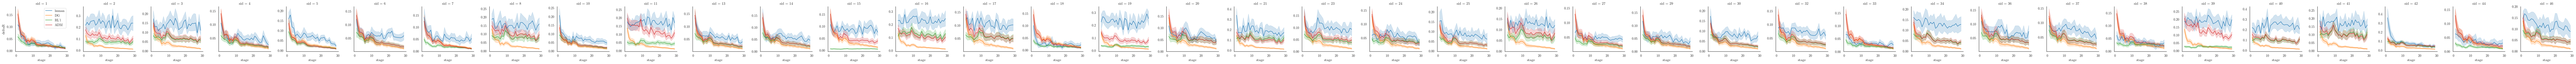

In [5]:
g = sns.FacetGrid(deltaRs, col="sid", sharey=False, sharex=True, legend_out=False)
g.map_dataframe(sns.lineplot, x="stage", y='deltaR', hue='type', palette=palette[:4])
g.add_legend()
g.savefig("plots/temporal_weighting_all_sid.jpg", dpi=100)
plt.show()

### Averaged over all models

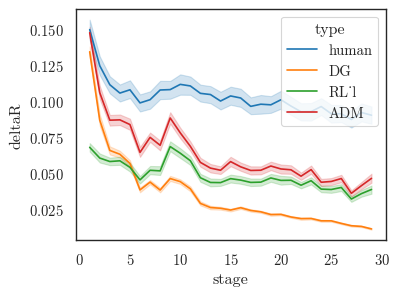

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
sns.lineplot(deltaRs, x='stage', y='deltaR', hue='type', palette=palette[:4])
fig.savefig("plots/temporal_weighting_averaged.jpg", dpi=600)

### Representative subjects

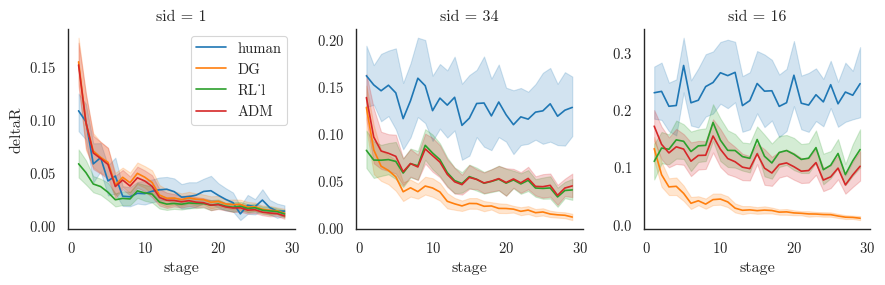

In [10]:
chosen_sids = [1, 34, 16]
g = sns.FacetGrid(deltaRs.query("sid==@chosen_sids"), col="sid", sharey=False, sharex=True, legend_out=False, col_order=chosen_sids)
g.map_dataframe(sns.lineplot, x="stage", y='deltaR', hue='type', palette=palette[:4])
g.add_legend()
g.savefig("plots/temporal_weighting_chosen_sid.jpg", dpi=100)
plt.show()

# Regress deltaR vs stage for each individual, plot distribution of slopes

In [16]:
dfs = []
columns = ['type', 'sid', 'slope', 'intercept', 'r-value', 'p-value', 'std-error']
for model_type in deltaRs['type'].unique():
    for sid in deltaRs['sid'].unique():
        subdata = deltaRs.query("type==@model_type & sid==@sid")
        stages = subdata['stage'].to_numpy()
        dRs = subdata['deltaR'].to_numpy()
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(stages, dRs)
        dfs.append(pd.DataFrame([[model_type, sid, slope, intercept, r_value, p_value, std_err]], columns=columns))
regression = pd.concat(dfs, ignore_index=True)
regression.to_pickle("data/temporal_weighting_regression.pkl")

In [17]:
regression

,type,sid,slope,intercept,r-value,p-value,std-error
0,human,1,-0.002014,0.064596,-0.422195,6.339673e-39,0.000147
1,human,2,-0.001205,0.246067,-0.061637,6.919332e-02,0.000662
2,human,3,-0.000090,0.139834,-0.007163,8.329011e-01,0.000427
3,human,4,-0.001124,0.067046,-0.200185,2.576893e-09,0.000187
4,human,5,-0.003275,0.120633,-0.435644,1.329193e-41,0.000230
...,...,...,...,...,...,...,...
147,ADM,40,-0.001909,0.136621,-0.216937,1.001728e-10,0.000292
148,ADM,41,-0.001859,0.133680,-0.213804,1.877429e-10,0.000288
149,ADM,42,-0.001995,0.091952,-0.346739,5.567519e-26,0.000183
150,ADM,44,-0.002328,0.074179,-0.508376,2.327239e-58,0.000134


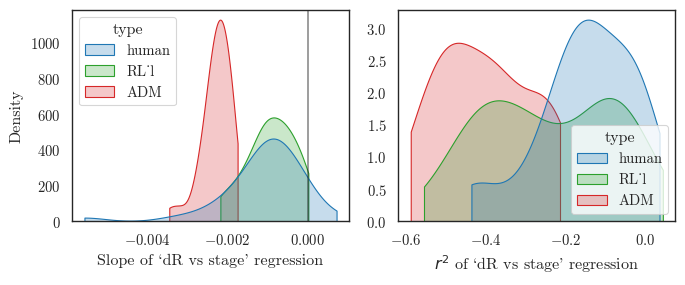

In [36]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6,3), sharex=True, sharey=True)
# sns.kdeplot(regression.query("type=='human'"), x='slope', fill=True, common_norm=False, label='human', cut=0, ax=axes[0])
# sns.kdeplot(regression.query("type=='RL_l'"), x='slope', fill=True, common_norm=False, label='RL_l', cut=0, ax=axes[1])
# sns.kdeplot(regression.query("type=='ADM'"), x='slope', fill=True, common_norm=False, label='ADM', cut=0, ax=axes[2])
# axes[0].set(title="human")
# axes[1].set(title="RL_l")
# axes[2].set(title="ADM")
palette2 = [palette[0], palette[2], palette[3]]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
sns.kdeplot(regression.query("type!='DG'"), x='slope', hue='type', fill=True, common_norm=False, cut=0, label='human', ax=axes[0], palette=palette2)
sns.kdeplot(regression.query("type!='DG'"), x='r-value', hue='type', fill=True, common_norm=False, cut=0, label='human', ax=axes[1], palette=palette2)
axes[0].set(xlabel="Slope of `dR vs stage' regression")
axes[1].set(xlabel=r"$r^2$ of `dR vs stage' regression", ylabel=None)
axes[0].axvline(0, color='k', alpha=0.5)
plt.tight_layout()
fig.savefig("plots/temporal_weighting_regression_distribution.jpg", dpi=600)

# Plot distribution of model parameters governing primacy vs recency

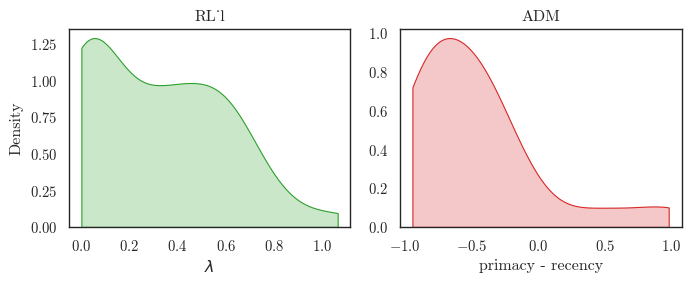

In [42]:
rl_l = pd.read_pickle("data/RL_l_yoo_apr2_params.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr2_params.pkl")
primacy_minus_recency = adm['primacy'].to_numpy() - adm['recency'].to_numpy()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3), sharey=False)
sns.kdeplot(rl_l, x='lambda', fill=True, common_norm=False, cut=0, ax=axes[0], color=palette[2])
sns.kdeplot(primacy_minus_recency, fill=True, common_norm=False, cut=0, ax=axes[1], color=palette[3])
axes[0].set(xlabel=r"$\lambda$", title="RL_l")
axes[1].set(xlabel="primacy - recency", ylabel=None, title="ADM")
plt.tight_layout()
fig.savefig("plots/temporal_weighting_parameter_distribution.jpg", dpi=600)

# Temporal weightning functions with fitted params

In [63]:
yoo = pd.read_pickle("data/yoo.pkl")
dfs = []
columns = ['type', 'sid', 'stage', 'weight']
max_stage = yoo['stage'].max()
for sid in yoo['sid'].unique():
    params_rl = pd.read_pickle("data/RL_l_yoo_apr2_params.pkl").query("sid==@sid").to_numpy()[0][2:]
    params_adm = pd.read_pickle("data/ADM_yoo_apr2_params.pkl").query("sid==@sid").to_numpy()[0][2:]
    ws_adm = []
    for stage in yoo['stage'].unique():
        w_rl = params_rl[0] * np.power(stage, -params_rl[1])
        w_adm = (1-(1-params_adm[0]**stage)*(1-params_adm[1]**(max_stage-stage+1))) * (1-params_adm[2]) + params_adm[2]
        dfs.append(pd.DataFrame([['RL_l', sid, stage, w_rl]], columns=columns))
        ws_adm.append(w_adm)
    ws_adm = np.array(ws_adm) / np.sum(ws_adm)
    for stage, w in enumerate(ws_adm):
        dfs.append(pd.DataFrame([['ADM', sid, stage+1, w]], columns=columns))
model_weights = pd.concat(dfs, ignore_index=True)
model_weights.to_pickle("data/temporal_weighting_model_weights.pkl")

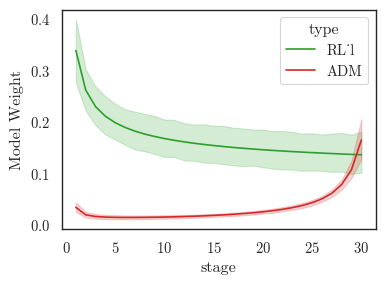

In [65]:
fig, ax = plt.subplots(figsize=(4,3))
sns.lineplot(model_weights, x='stage', y='weight', hue='type', palette=palette[2:4], ax=ax)
plt.tight_layout()
ax.set(ylabel='Model Weight')
fig.savefig("plots/temporal_weighting_model_weights_averaged.jpg", dpi=600)

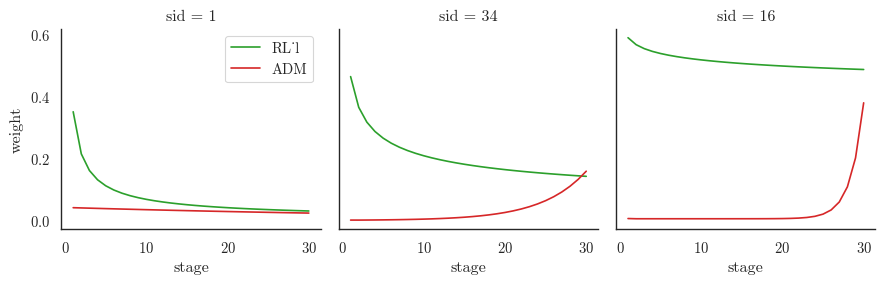

In [67]:
chosen_sids = [1, 34, 16]
g = sns.FacetGrid(model_weights.query("sid==@chosen_sids"), col="sid", sharey=True, sharex=True, legend_out=False, col_order=chosen_sids)
g.map_dataframe(sns.lineplot, x="stage", y='weight', hue='type', palette=palette[2:4])
g.add_legend()
g.savefig("plots/temporal_weighting_model_weights_chosen_sid.jpg", dpi=100)
plt.show()

# Carrabin

In [10]:
carrabin = pd.read_pickle("data/carrabin.pkl")
carrabin['type'] = 'human'
bayes = pd.read_pickle("data/B_n_carrabin_mar6_dynamics.pkl")
rl = pd.read_pickle("data/RL_n_carrabin_mar6_dynamics.pkl")
combined = pd.concat([carrabin, bayes, rl], ignore_index=True)
dfs = []
columns = ['type', 'sid', 'trial', 'stage', 'deltaR']
for model_type in combined['type'].unique():
    for sid in combined['sid'].unique():
        print(model_type, sid)
        for trial in combined.query("sid==@sid")['trial'].unique():
            stages = combined['stage'].unique()
            for s in range(len(stages)-1):
                stage_old = stages[s]
                stage_new = stages[s+1]
                subdata = combined.query("type==@model_type & sid==@sid & trial==@trial")
                response_old = subdata.query("stage==@stage_old")['response'].to_numpy()[0]
                response_new = subdata.query("stage==@stage_new")['response'].to_numpy()[0]
                observation = subdata.query("stage==@stage_old")['color'].to_numpy()[0]
                deltaR = np.abs(response_new - response_old)
                dfs.append(pd.DataFrame([[model_type, sid, trial, stage_old, deltaR]], columns=columns))
deltaRs = pd.concat(dfs, ignore_index=True)

human 1
human 2
human 3
human 4
human 5
human 6
human 7
human 8
human 9
human 10
human 11
human 12
human 13
human 14
human 15
human 16
human 17
human 18
human 19
human 20
human 21
B_n 1
B_n 2
B_n 3
B_n 4
B_n 5
B_n 6
B_n 7
B_n 8
B_n 9
B_n 10
B_n 11
B_n 12
B_n 13
B_n 14
B_n 15
B_n 16
B_n 17
B_n 18
B_n 19
B_n 20
B_n 21
RL_n 1
RL_n 2
RL_n 3
RL_n 4
RL_n 5
RL_n 6
RL_n 7
RL_n 8
RL_n 9
RL_n 10
RL_n 11
RL_n 12
RL_n 13
RL_n 14
RL_n 15
RL_n 16
RL_n 17
RL_n 18
RL_n 19
RL_n 20
RL_n 21


/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learnin

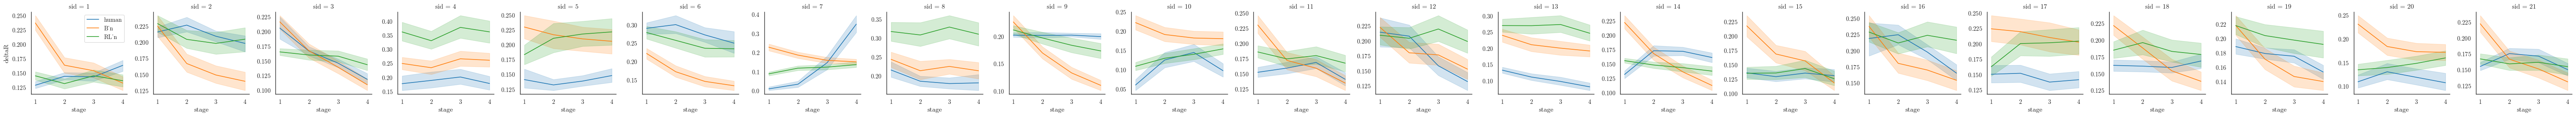

/tmp/ipykernel_41057/277412134.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(deltaRs, x='stage', y='deltaR', hue='type', palette=palette[:4])


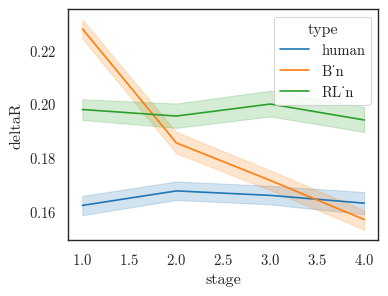

In [11]:
g = sns.FacetGrid(deltaRs, col="sid", sharey=False, sharex=True, legend_out=False)
g.map_dataframe(sns.lineplot, x="stage", y='deltaR', hue='type', palette=palette[:4])
g.add_legend()
g.savefig("plots/carrabin_temporal_weighting_all_sid.jpg", dpi=100)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))
sns.lineplot(deltaRs, x='stage', y='deltaR', hue='type', palette=palette[:4])
fig.savefig("plots/carrabin_temporal_weighting_averaged.jpg", dpi=600)